In [1]:
%config InlineBackend.figure_formats = ['svg']

import quimb as qu
import quimb.tensor as qtn

In [2]:
import cotengra as ctg

opt = ctg.ReusableHyperOptimizer(
    methods=['greedy'],
    reconf_opts={}, 
    max_repeats=32,
    max_time="rate:1e6",
    parallel=True,
    # use the following for persistently cached paths
    # directory=True,
)

/home/iisers/.local/lib/python3.8/site-packages/cotengra/hyper.py:29: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn("Couldn't import `kahypar` - skipping from default "


In [22]:
import networkx as nx

reg = 3
n = 4
seed = 666
G1 = nx.random_regular_graph(reg, n, seed=seed)

#terms = {(i, j): 1 for i, j in G1.edges}

In [7]:
G1.nodes()

NodeView((0, 1, 2, 3))

In [23]:
ZZ = qu.pauli('Z') & qu.pauli('Z')
Z = qu.pauli('Z')
I = qu.pauli('I')


In [94]:
(I*(np.array([[0],[1]]))).shape


(2, 2)

In [91]:
I.shape

(2, 2)

In [26]:
terms = {
    (i, j): (i+j)  
    for i, j in G1.edges
} 
terms1 =  {
    (i,i): 2*i 
    for i in G1.nodes
}
print(terms
)

{(0, 1): 1, (0, 3): 3, (0, 2): 2, (1, 2): 3, (1, 3): 4, (2, 3): 5}


In [24]:
number_of_cities = 3
list_of_qubits = list(range(number_of_cities**2))
print(list_of_qubits)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [26]:
p = 4
gammas = qu.randn(p)
betas = qu.randn(p)
circ_ex = qtn.circ_qaoa((terms), p, gammas, betas)

NameError: name 'terms' is not defined

In [ ]:
terms1 = {
    (i, j): J[i][j]
    for i, j in G1.edges
}

terms2 = {
    (i, j): J[i][j]*ZZ 
    for i, j in G1.edges
}| {
   i: h[i]* Z
    for i in G2.nodes
}

In [73]:
#!/usr/bin/env python3

#import pyquil.api as api
#from classical import rand_graph, classical, bitstring_to_path, calc_cost
#from pyquil.paulis import sI, sZ, sX, exponentiate_commuting_pauli_sum
#from scipy.optimize import minimize
#from pyquil.api import WavefunctionSimulator
#from pyquil.gates import H
#from pyquil import Program

#from collections import Counter

#from tsp_qaoa_updated import binary_state_to_points_order

#import sys
import numpy as np
num_cities = 3
# returns the bit index for an alpha and j
def bit(alpha, j):
    return j * num_cities + alpha  # qubit index 

def D(alpha, j): # the operator acts on that particular qubit specified by qubit index 
    b = bit(alpha, j)
    return .5 * (sI(b) - sZ(b))



In [96]:
from pyquil.paulis import sI, sZ, sX, exponentiate_commuting_pauli_sum

In [102]:
#!pip install qiskit
from qiskit import IBMQ
IBMQ.save_account('3ccb2d17a0f19c3ce64cf44b3e1c90d3369ea562672f7315624ee8d92bb4350e10b643e3b2af92eef73c029e051518c2a833fb0ffa2e600b2c6c65ed5dd29d40')
IBMQ.load_account()
from qiskit import *
import math as m
import time
from copy import deepcopy
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
#simulators
S_simulator = Aer.backends(name = 'statevector_simulator')[0]
M_simulator = Aer.backends(name = 'qasm_simulator')[0]
U_simulator = Aer.backends(name = 'unitary_simulator')[0]
#provider = IBMQ.get_provider(hub = 'ibm-q-research')
import matplotlib.pyplot as plt

configrc.store_credentials:WARNING:2022-12-31 19:29:20,630: Credentials already present. Set overwrite=True to overwrite.


In [145]:
from qiskit.opflow import MatrixOp, X,Y,Z,I

In [106]:
q = QuantumRegister(num_cities**2)
qc  = QuantumCircuit(q)

In [144]:
x = (X.to_circuit())
qc.x(0)
qc.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
q1_0: ┤ H ├┤ H ├┤ I ├┤ I ├┤ I ├┤ Z ├┤ X ├
      └───┘└───┘└───┘└───┘└───┘└───┘└───┘
q1_1: ───────────────────────────────────
                                         
q1_2: ───────────────────────────────────
                                         
q1_3: ───────────────────────────────────
                                         
q1_4: ───────────────────────────────────
                                         
q1_5: ───────────────────────────────────
                                         
q1_6: ───────────────────────────────────
      ┌───┐┌───┐                         
q1_7: ┤ I ├┤ Z ├─────────────────────────
      └───┘└───┘                         
q1_8: ───────────────────────────────────

In [147]:
op = 1/2*(I-Z)


ExtensionError: 'Input matrix is not unitary.'

In [120]:
def qubit(i, t):
    return t * num_cities + i

def D(i, t):
    b = qubit(i, t)
    return .5 * (qc.i(b) - qc.z(b))

In [121]:
ret = 0
def constraint_a():
    
    for i in range(num_cities):
        cur = qc.i(i)
        for t in range(num_cities):
            cur -= D(i, t)
        ret += cur**2


In [122]:
constraint_a()

TypeError: unsupported operand type(s) for -: 'InstructionSet' and 'InstructionSet'

In [124]:

# returns the bit index for an alpha and j
def bit(alpha, j):
    return j * num_cities + alpha

def D(alpha, j):
    b = bit(alpha, j)
    return .5 * (sI(b) - sZ(b))


In [131]:

def constraint():
    ret = 0
    for i in range(num_cities):
        cur = sI()
        for j in range(num_cities):
            cur -= D(i, j)
        ret += cur**2
    return ret


In [142]:
type(constraint())

pyquil.paulis.PauliSum

PauliOp(Pauli('X'), coeff=1.0)

In [30]:
"""
weights and connections are numpy matrixes that define a weighted and unweighted graph
penalty: how much to penalize longer routes (penalty=0 pays no attention to weight matrix)
"""
def build_cost(penalty, num_cities, weights, connections):
    ret = 0
    # constraint (a)
    for i in range(num_cities):
        cur = sI()
        for j in range(num_cities):
            cur -= D(i, j)
        ret += cur**2

    # constraint (b)
    for i in range(num_cities):
        cur = sI()
        for j in range(num_cities):
            cur -= D(j, i)
        ret += cur**2

    # constraint (c)
    for i in range(num_cities-1):
        cur = sI()
        for j in range(num_cities):
            for k in range(num_cities):
                if connections[j, k]:
                    cur -= D(j, i) * D(k, i+1)
        ret += cur

    # constraint (d) (the weighting)
    for i in range(num_cities-1):
        cur = sI()
        for j in range(num_cities):
            for k in range(num_cities):
                if connections[j, k]:
                    cur -= D(j, i) * D(k, i+1) * weights[j, k]
        ret += cur * penalty
    return ret



 

     |████████████████████████████████| 221 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 44 kB 546 kB/s  eta 0:00:01
     |████████████████████████████████| 147 kB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 877 kB/s  eta 0:00:01
     |████████████████████████████████| 49 kB 899 kB/s  eta 0:00:01
     |████████████████████████████████| 3.2 MB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 538 kB/s  eta 0:00:01
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
     |████████████████████████████████| 58 kB 609 kB/s  eta 0:00:01
     |████████████████████████████████| 80 kB 1.9 MB/s  eta 0:00:01
  Created wheel for lark: filename=lark-0.11.3-py2.p

In [ ]:
qtn.Circuit(N)

In [14]:
def circuit_qaoa(
    terms,
    diagonal_terms,
    depth,
    gammas,
    betas,
    **circuit_opts,
):
    r"""Generate the QAOA circuit for weighted graph described by ``terms``.

    .. math::

        |{\bar{\gamma}, \bar{\beta}}\rangle = U_B (\beta _p)
        U_C (\gamma _p) \cdots U_B (\beta _1) U_C (\gamma _1) |{+}\rangle

    with

    .. math::

        U_C (\gamma) = e^{-i \gamma \mathcal{C}} = \prod \limits_{i, j
        \in E(G)} e^{-i \gamma w_{i j} Z_i Z_j}

    and

    .. math::

        U_B (\beta) = \prod \limits_{i \in G} e^{-i \beta X_i}


    Parameters
    ----------
    terms : dict[tuple[int], float]
        The mapping of integer pair keys ``(i, j)`` to the edge weight values,
        ``wij``. The integers should be a contiguous range enumerated from
        zero, with the total number of qubits being inferred from this.
    diagonal_terms: dict[tuple[int], float]
        the mapping of diagonal terrms (i,i) to the weight values or external field values 
    depth : int
        The number of layers of gates to apply, ``p`` above.
    gammas : iterable of float
        The interaction angles for each layer.
    betas : iterable of float
        The rotation angles for each layer.
    circuit_opts
        Supplied to :class:`~quimb.tensor.circuit.Circuit`. Note
        ``gate_opts={'contract': False}`` is set by default (it can be
        overridden) since the RZZ gate, even though it has a rank-2
        decomposition, is also diagonal.
    """
    #from .circuit import Circuit


    circuit_opts.setdefault('gate_opts', {})
    circuit_opts['gate_opts'].setdefault('contract', False)


    n = 9
    #max(itertools.chain.from_iterable(terms)) + 1


    gates = []


    # layer of hadamards to get into plus state
    for i in range(n):
        gates.append((0, 'h', i))


    for d in range(depth):
        for (i, j), wij in terms.items():
            gates.append((d, 'rzz', wij * gammas[d], i, j))
        
        for i, h_i in diagonal_terms.items():
            gates.append((d, 'rz',h_i* gammas[d],i))


        for i in range(n):
            gates.append((d, 'rx', -betas[d] * 2, i))


    circ = qtn.Circuit(n, **circuit_opts)
    circ.apply_gates(gates)


    return circ

In [13]:
pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
Note: you may need to restart the kernel to use updated packages.


Ising Hamiltonian:
-1282.5 * IIIIIIIIZ
- 1282.5 * IIIIIIIZI
- 1282.5 * IIIIIIZII
- 1268.5 * IIIIIZIII
- 1268.5 * IIIIZIIII
- 1268.5 * IIIZIIIII
- 1290.0 * IIZIIIIII
- 1290.0 * IZIIIIIII
- 1290.0 * ZIIIIIIII
+ 606.5 * IIIIIIIZZ
+ 606.5 * IIIIIIZIZ
+ 606.5 * IIIIIIZZI
+ 606.5 * IIIIIZIIZ
+ 12.0 * IIIIIZIZI
+ 12.0 * IIIIIZZII
+ 12.0 * IIIIZIIIZ
+ 606.5 * IIIIZIIZI
+ 12.0 * IIIIZIZII
+ 606.5 * IIIIZZIII
+ 12.0 * IIIZIIIIZ
+ 12.0 * IIIZIIIZI
+ 606.5 * IIIZIIZII
+ 606.5 * IIIZIZIII
+ 606.5 * IIIZZIIII
+ 606.5 * IIZIIIIIZ
+ 22.75 * IIZIIIIZI
+ 22.75 * IIZIIIZII
+ 606.5 * IIZIIZIII
+ 15.75 * IIZIZIIII
+ 15.75 * IIZZIIIII
+ 22.75 * IZIIIIIIZ
+ 606.5 * IZIIIIIZI
+ 22.75 * IZIIIIZII
+ 15.75 * IZIIIZIII
+ 606.5 * IZIIZIIII
+ 15.75 * IZIZIIIII
+ 606.5 * IZZIIIIII
+ 22.75 * ZIIIIIIIZ
+ 22.75 * ZIIIIIIZI
+ 606.5 * ZIIIIIZII
+ 15.75 * ZIIIIZIII
+ 15.75 * ZIIIZIIII
+ 606.5 * ZIIZIIIII
+ 606.5 * ZIZIIIIII
+ 606.5 * ZZIIIIIII

In [4]:
edges = []
for j in range(9):
    for i in range(9):
        if i < j:
            edges.append((i,j))
print(edges)

weights = [606.5,606.5,606.5,606.5,15.75,15.75,15.75,606.5,15.75,606.5,15.75,15.75,606.5,606.5,606.5,606.5,22.75,22.75,606.5,12,12,22.75,606.5,22.75,12,606.5,12,606.5,22.75,22.75,606.5,12,12,606.5,606.5,606.5]

graph = dict(zip(edges,weights))
print(graph)

[(0, 1), (0, 2), (1, 2), (0, 3), (1, 3), (2, 3), (0, 4), (1, 4), (2, 4), (3, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (0, 8), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]
{(0, 1): 606.5, (0, 2): 606.5, (1, 2): 606.5, (0, 3): 606.5, (1, 3): 15.75, (2, 3): 15.75, (0, 4): 15.75, (1, 4): 606.5, (2, 4): 15.75, (3, 4): 606.5, (0, 5): 15.75, (1, 5): 15.75, (2, 5): 606.5, (3, 5): 606.5, (4, 5): 606.5, (0, 6): 606.5, (1, 6): 22.75, (2, 6): 22.75, (3, 6): 606.5, (4, 6): 12, (5, 6): 12, (0, 7): 22.75, (1, 7): 606.5, (2, 7): 22.75, (3, 7): 12, (4, 7): 606.5, (5, 7): 12, (6, 7): 606.5, (0, 8): 22.75, (1, 8): 22.75, (2, 8): 606.5, (3, 8): 12, (4, 8): 12, (5, 8): 606.5, (6, 8): 606.5, (7, 8): 606.5}


In [5]:
graph.items()

dict_items([((0, 1), 606.5), ((0, 2), 606.5), ((1, 2), 606.5), ((0, 3), 606.5), ((1, 3), 15.75), ((2, 3), 15.75), ((0, 4), 15.75), ((1, 4), 606.5), ((2, 4), 15.75), ((3, 4), 606.5), ((0, 5), 15.75), ((1, 5), 15.75), ((2, 5), 606.5), ((3, 5), 606.5), ((4, 5), 606.5), ((0, 6), 606.5), ((1, 6), 22.75), ((2, 6), 22.75), ((3, 6), 606.5), ((4, 6), 12), ((5, 6), 12), ((0, 7), 22.75), ((1, 7), 606.5), ((2, 7), 22.75), ((3, 7), 12), ((4, 7), 606.5), ((5, 7), 12), ((6, 7), 606.5), ((0, 8), 22.75), ((1, 8), 22.75), ((2, 8), 606.5), ((3, 8), 12), ((4, 8), 12), ((5, 8), 606.5), ((6, 8), 606.5), ((7, 8), 606.5)])

In [6]:
lattice_cite = [i for i in range(9)]
field_str = [-1290,-1290,-1290,-1268.5,-1268.5,-1268.5,-1282.5,-1282.5,-1282.5]
diag_terms = dict(zip(lattice_cite,field_str))

In [18]:
print(diag_terms)

{0: -1290, 1: -1290, 2: -1290, 3: -1268.5, 4: -1268.5, 5: -1268.5, 6: -1282.5, 7: -1282.5, 8: -1282.5}


In [15]:
p = 4
gammas = qu.randn(p)
betas = qu.randn(p)
circ_ex = circuit_qaoa(graph,diag_terms, p, gammas, betas)

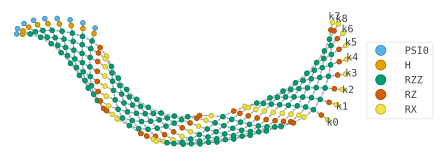

In [16]:
circ_ex.psi.draw(color=['PSI0', 'H', 'RZZ','RZ', 'RX'],show_inds=True)


In [ ]:
def energy(x):
    p = len(x) // 2
    gammas = x[:p]
    betas = x[p:]
    circ = circuit_qaoa(graph,diag_terms, p, gammas, betas)
    ens = [
        circ.local_expectation(G, where, optimize=opt)
        for where, G in terms2.items()
    ]
    return sum(ens).real

In [30]:
pip install Circuit

Note: you may need to restart the kernel to use updated packages.


In [4]:
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.problems import QuadraticProgram

In [2]:
pip install qiskit_optimization

     |████████████████████████████████| 159 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 640 kB 11.8 MB/s eta 0:00:01
  Created wheel for docplex: filename=docplex-2.24.232-py3-none-any.whl size=682275 sha256=1003cb36fd90e24985d54e3f754bb88371fb6eba08801d1c9ad1bd8d06021fab
  Stored in directory: /home/iisers/.cache/pip/wheels/cd/84/5d/b9c307d9cf361c49d41ddea36761e226bba3afdfd038673dcd
Successfully built docplex
Note: you may need to restart the kernel to use updated packages.


In [ ]:
problem = QuadraticProgram()
conv = QuadraticProgramToQubo()
qubitOp, offset = problem.to_ising()